In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv('./Data/BTC-USD-19.07.csv',sep=',', date_parser=True)
df.drop('Adj Close', inplace = True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [31]:
End = '2015-10-15'

In [32]:
End = pd.to_datetime(End)
Start = (End - timedelta(days=365))
df1 = df.loc[Start:End]
df1.index = df1.index.map(mdates.date2num)

In [33]:
Min_pozycja = df1['Low'].argmin()
Max_pozycja = df1['High'].argmax()

if Min_pozycja < Max_pozycja and Max_pozycja < len(df1)-10:
    
    
    #Trend wzrostowy L1
    
    Max_idx = df1.iloc[Max_pozycja].name
    Ax = df1.iloc[Min_pozycja].name
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Min_pozycja].name
    By = df1['Low'].loc[Bx]
    B = [Bx, By]
    
    a1 = (Ay-By)/(Ax-Bx)
    b1 = By - a1 * Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a1 + b1
    df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']>=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df11['Pozycja na LT'] = df11.index * a1 + b1
        df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']>=0].count()
        sum = len(df11['check'])

        if good == sum:
            
            print('Pierwszy trend:  Wzrostowy')
            print('Max/Min:  Wcześniej niż 10 dni od końca')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić trend L1 wzrostowy')
            print(f'Punkt A:{A}, Punkt C: {C}')
            print('------------------------------------------------------------------------------')
            break
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['Low'].loc[Bx]
            B = [Bx, By]

            a1 = (Ay-By)/(Ax-Bx)
            b1 = By - a1 * Bx
                
            Cx = df1.index.max() + 10
            Cy = a1 * Cx + b1
            C = [Cx, Cy]
            
            
            if Cy < df1.High.mean()*0.3:
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a1*Cx +b1
                    if Cy>df1.High.mean()*0.3:
                        break
            elif Cy > df1.High.max()*(3/2):
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a1*Cx +b1
                    if Cy < df1.High.max()*(3/2):
                        break

            X_long = [Ax, Cx]
            Y_long = [Ay, Cy]
    
    
    #--------------------------------------------------------------------
    # Trend spadkowy M1
    df2 = df1.iloc[Max_pozycja:]
    Min_pozycja2 = df2['Low'].argmin()
    Max_idx2 = df2.iloc[Min_pozycja2].name
    
    
    Ax = df2.iloc[0].name
    Ay = df2['High'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df2.iloc[0].name
    By = df2['High'].loc[Bx]
    B = [Bx, By]
    
    a2 = (Ay-By)/(Ax-Bx)
    b2 = By - a2 * Bx
    
    df21 = df2[A[0]:Max_idx2]
    df21['Pozycja na LT'] = df21.index * a2 + b2
    df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']<=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df2[B[0]:Max_idx2]
        Bx = df21.iloc[0].name
        By = df21['High'].loc[Bx]
        B = [Bx, By]

        a2 = (Ay-By)/(Ax-Bx)
        b2 = By - a2 * Bx

        df21['Pozycja na LT'] = df21.index * a2 + b2
        df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']<=0].count()
        sum = len(df21['check'])

        if good == sum:
            print('TREND M1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
            
        else:
            df21=df2[B[0]+1:Max_idx2]
            Bx = df21.iloc[0].name
            By = df21['High'].loc[Bx]
            B = [Bx, By]

            a2 = (Ay-By)/(Ax-Bx)
            b2 = By - a2 * Bx
                
            Cx = df21.index.max() + 30
            Cy = a2 * Cx + b2
            C = [Cx, Cy]
            
            if Cy < df1.High.mean()*0.3:
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a2*Cx +b2
                    if Cy>df1.High.mean()*0.3:
                        break
                        
            elif Cy > df1.High.max()*(3/2):
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a2*Cx +b2
                    if Cy < df1.High.max()*(3/2):
                        break
            
            

            X_mid1 = [Ax, Cx]
            Y_mid1 = [Ay, Cy]
            
            
#----------------------------------------------------------------------------------------------------------------------

elif Min_pozycja > Max_pozycja and Max_pozycja < len(df1)-10:
    
    # Trend spadkowy L1
    
    Max_idx = df1.iloc[Min_pozycja].name
    Ax = df1.iloc[Max_pozycja].name
    Ay = df1['High'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Max_pozycja].name
    By = df1['High'].loc[Bx]
    B = [Bx, By]
    
    a1 = (Ay-By)/(Ax-Bx)
    b1 = By - a1 * Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a1 + b1
    df11['check']= round(df11['High'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']<=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['High'].loc[Bx]
        B = [Bx, By]

        a1 = (Ay-By)/(Ax-Bx)
        b1 = By - a1 * Bx

        df11['Pozycja na LT'] = df11.index * a1 + b1
        df11['check']= round(df11['High'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']<=0].count()
        sum = len(df11['check'])

        if good == sum:
            print('Pierwszy trend:  Malejący')
            print('Max/Min:  Wcześniej niż 10 dni od końca')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 spadkowy')
            print(f'Punkt A:{A}, Punkt C: {C}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['High'].loc[Bx]
            B = [Bx, By]

            a1 = (Ay-By)/(Ax-Bx)
            b1 = By - a1 * Bx
                
            Cx = df1.index.max() -220
            Cy = a1 * Cx + b1
            C = [Cx, Cy]
        
            if Cy < df1.High.mean()*0.3:
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a1*Cx +b1
                    if Cy>df1.High.mean()*0.3:
                        break
                        
            elif Cy > df1.High.max()*(3/2):
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a1*Cx +b1
                    if Cy < df1.High.max()*(3/2):
                        break

        X_long = [Ax, Cx]
        Y_long = [Ay, Cy]
        
        
# Trend wzrostowy M1
    
    df2 = df1.iloc[Min_pozycja:]
    Max_pozycja2 = df2['High'].argmax()
    Max_idx2 = df2.iloc[Max_pozycja2].name
    
    Ax = df2.iloc[0].name
    Ay = df2['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df2.iloc[0].name
    By = df2['Low'].loc[Bx]
    B = [Bx, By]
    
    a2 = (Ay-By)/(Ax-Bx)
    b2 = By - a2 * Bx
    
    df21 = df2[A[0]:Max_idx2]
    df21['Pozycja na LT'] = df21.index * a2 + b2
    df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']>=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df2[B[0]:Max_idx2]
        Bx = df21.iloc[0].name
        By = df21['Low'].loc[Bx]
        B = [Bx, By]

        a2 = (Ay-By)/(Ax-Bx)
        b2 = By - a2 * Bx

        df21['Pozycja na LT'] = df21.index * a2 + b2
        df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']>=0].count()
        sum = len(df21['check'])

        if good == sum:
            print('TREND M1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu M1 - wzrostowy')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
            
        else:
            df21=df2[B[0]+1:Max_idx2]
            Bx = df21.iloc[0].name
            By = df21['Low'].loc[Bx]
            B = [Bx, By]

            a2 = (Ay-By)/(Ax-Bx)
            b2 = By - a2 * Bx
                
            Cx = df2.index.max() +10
            Cy = a2 * Cx + b2
            C = [Cx, Cy]
            
            if Cy < df1.High.mean()*0.3:
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a2*Cx +b2
                    if Cy>df1.High.mean()*0.3:
                        break
                        
            elif Cy > df1.High.max()*(3/2):
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a2*Cx +b2
                    if Cy < df1.High.max()*(3/2):
                        break

            X_mid1 = [Ax, Cx]
            Y_mid1 = [Ay, Cy]
            
else:
    print('Max/Min znajduje się w ostatnich 10 dniach anlalizowanego okresu')


Pierwszy trend:  Malejący
Max/Min:  Wcześniej niż 10 dni od końca
------------------------------------------------------------------------------
TREND L1
Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 spadkowy
Punkt A:[16387.0, 457.092987], Punkt C: [16503.0, 133.57611508163245]
------------------------------------------------------------------------------
TREND M1
Znaleziona 2 punkty przez które można przeprowadzić linie trendu M1 - wzrostowy
Punkt A:[16449.0, 171.509995], Punkt C: [16733.0, 272.37337994444533]


# Funkcja - sprawdzamy, czy trend został przerwany

Dla trendu L1 szukamy od Max_idx

Dla trendu M1 szukamy od Max_idx2

---------------------------------------------------------------------------
Przesówamy się 2 miesiące do przodu, żeby sprawdzić czy tunele przebicia lini trendu dały sygnał zakupu. W zasadzie sygnał mógłby zaistnieć już po kilku dniach, jednak celowo przesówam się o kilka miesiący, aby sprawdzić również skuteczność sygnału

In [51]:
End = '2015-12-11'

In [52]:
End = pd.to_datetime(End)
dfxx = df.loc[Start:End]
dfxx.index = dfxx.index.map(mdates.date2num)

In [53]:
#Zakres szukania i podstawione wartości z linie trendu
dfM1 = dfxx[Max_idx2:]
dfM1['TrendLine'] = dfM1.index * a2 + b2

#Sprawdzamy położenie Lini trendu względem ceny zamknięcia i ceny otwarcia
dfM1['Distance(Close-TL)'] = dfM1['TrendLine'] - dfM1['Close']
dfM1['Distance(Open-TL)'] = dfM1['TrendLine'] - dfM1['Open']

#Zbieramy wartości dla trendu wzrostowego i spadkowego
GrowingTLClose = len(dfM1.index[dfM1['Distance(Close-TL)']>0])
GrowingTLOpen = len(dfM1.index[dfM1['Distance(Open-TL)']>0])
DecliningTLClose = len(dfM1.index[dfM1['Distance(Close-TL)']<0])
DecliningTLOpen = len(dfM1.index[dfM1['Distance(Open-TL)']<0])

#Dla a2 > 0 - wzrostowy używamy Growing, dla a2 < 0 - spadkowy używamy Declining
if (a2 > 0 and (GrowingTLClose > 0 or GrowingTLOpen > 0)) or (a2 < 0 and (DecliningTLClose > 0 or DecliningTLOpen > 0)):
    print('Trend został przełamany')
else:
    print('Brak przełamań lini trendu')

Trend został przełamany


# Sprawdzamy czy przebicia na open i close znajdują się w ostatnich 50 dniach

In [54]:
#Zbieramy wartości dla trendu wzrostowego i spadkowego

GrowingTLClosePosition = dfM1.index[dfM1['Distance(Close-TL)']>0][0]
GrowingTLOpenPosition = dfM1.index[dfM1['Distance(Open-TL)']>0][0]
DecliningTLClosePosition = dfM1.index[dfM1['Distance(Close-TL)']<0][0]
DecliningTLOpenPosition = dfM1.index[dfM1['Distance(Open-TL)']<0][0]

EndingPoint = dfxx.index[-50]

if a2 > 0:

    if GrowingTLClosePosition < EndingPoint:
        print('Pierwsza cena zamknięcia przebijająca trend znajduje się dalej niż 80 dni od końca')
    else:
        print(f'Pierwsza cena zamknięcia przebijająca trend ma pozycje {GrowingTLClosePosition} ')

    if GrowingTLOpenPosition < EndingPoint:
        print('Pierwsza cena otwarcia przebijająca trend znajduje się dalej niż 80 dni od końca')
    else:
        print(f'Pierwsza cena otwarcia przebijająca trend ma pozycje {GrowingTLOpenPosition} ')
    

    
if a2 < 0:    
    
    if DecliningTLClosePosition < EndingPoint:
        print('Pierwsza cena zamknięcia przebijająca trend znajduje się dalej niż 80 dni od końca')
    else:
        print(f'Pierwsza cena zamknięcia przebijająca trend ma pozycje {DecliningTLClosePosition} ')

    if DecliningTLOpenPosition < EndingPoint:
        print('Pierwsza cena otwarcia przebijająca trend znajduje się dalej niż 80 dni od końca')
    else:
        print(f'Pierwsza cena otwarcia przebijająca trend ma pozycje {DecliningTLOpenPosition} ')

Pierwsza cena zamknięcia przebijająca trend znajduje się dalej niż 80 dni od końca
Pierwsza cena otwarcia przebijająca trend znajduje się dalej niż 80 dni od końca


# Sprawdzamy w jaki sposób trend został przebity i wybieramy pozycje dla BP1

DLA TRENDU SPADKOWEGO:
1) Świeca od open do close - klasycznie

2) Świeca od close do open

3) Open i Close nad TL


DLA TRNDU WZROSTOWEGO:
1) Świeca od open do close - klasycznie

2) Świeca od close do open

3) Open i Close pod TL


In [55]:
#Trend spadkowy
if a2 < 0:
    if DecliningTLClosePosition < DecliningTLOpenPosition:
        print('Klasycznie w górę')
        
        BPPosition = DecliningTLClosePosition
        BPPrice = BPPosition * a2 + b2
        
        print(f'Pozycja przecięcia: {BPPosition}')
        print(f'Cena przecięcia: {BPPrice}')
        
    elif DecliningTLClosePosition > DecliningTLOpenPosition:
        print('Cena otwacia nad TL, cena zamknięcia pod TL')
        
        BPPosition = DecliningTLOpenPosition
        BPPrice = BPPosition * a2 + b2
        
        print(f'Pozycja przecięcia: {BPPosition}')
        print(f'Cena przecięcia: {BPPrice}')
        
    elif DecliningTLClosePosition == DecliningTLOpenPosition:
        print('Cała świeca nad TL')
        
        BPPosition = DecliningTLClosePosition - 1
        BPPrice = BPPosition * a2 + b2
        
        print(f'Pozycja przecięcia: {BPPosition}')
        print(f'Cena przecięcia: {BPPrice}')
        
#Trend wzrostwy        
if a2 > 0:
    
    if GrowingTLClosePosition < GrowingTLOpenPosition:
        print('Klasycznie w dół')
        
        BPPosition = GrowingTLClosePosition
        BPPrice = BPPosition * a2 + b2
        
        print(f'Pozycja przecięcia: {BPPosition}')
        print(f'Cena przecięcia: {BPPrice}')
        
    elif GrowingTLClosePosition > GrowingTLOpenPosition:
        print('Cena otwacia pod TL, cena zamknięcia nad TL')
        
        BPPosition = GrowingTLOpenPosition
        BPPrice = BPPosition * a2 + b2
        
        print(f'Pozycja przecięcia: {BPPosition}')
        print(f'Cena przecięcia: {BPPrice}')
        
    elif GrowingTLClosePosition == GrowingTLOpenPosition:
        print('Cała świeca pod TL')
        
        BPPosition = GrowingTLClosePosition - 1
        BPPrice = BPPosition * a2 + b2
        
        print(f'Pozycja przecięcia: {BPPosition}')
        print(f'Cena przecięcia: {BPPrice}')
        
        

Klasycznie w dół
Pozycja przecięcia: 16665.0
Cena przecięcia: 248.2229920000009


# Sprawdzamy wielkość tuneli w stosunku do wielkości świec

Dla całych świeczek przebijających wykres sprawdzamy którą wartość bierzemy open, czy close?

In [56]:
CloseBPPrice = dfM1['Close'].loc[BPPosition]
OpenBPPrice = dfM1['Open'].loc[BPPosition]

BPPositionEnd = dfM1.index[-1] + 5
UplineX = [BPPosition, BPPositionEnd]
DownlineX = [BPPosition, BPPositionEnd]


#Trend spadkowy
if a2 < 0:
    
    #Klasycznie
    if DecliningTLClosePosition < DecliningTLOpenPosition:
    
        TunelHeight = CloseBPPrice - BPPrice
        CandleHeight = CloseBPPrice - OpenBPPrice   
        

    #Cena open nad close pod TL    
    elif DecliningTLClosePosition > DecliningTLOpenPosition:
    
        TunelHeight = BPPrice - CloseBPPrice
        CandleHeight = OpenBPPrice - CloseBPPrice
        

    #Open i close nad TL    
    elif DecliningTLClosePosition == DecliningTLOpenPosition:
        
        if OpenBPPrice > CloseBPPrice:
            
            UplineY = [BPPrice, BPPrice]
            DownlineY = [CloseBPPrice, CloseBPPrice]
            
        else:
            
            UplineY = [BPPrice, BPPrice]
            DownlineY = [OpenBPPrice, OpenBPPrice]

        
#Trend wzrostwy        
if a2 > 0:
    
    #Klasycznie
    if GrowingTLClosePosition < GrowingTLOpenPosition:
        
        TunelHeight = BPPrice - CloseBPPrice
        CandleHeight = OpenBPPrice - CloseBPPrice
        

    #Cena open pod close nas TL    
    elif GrowingTLClosePosition > GrowingTLOpenPosition:
        
        TunelHeight = CloseBPPrice - BPPrice
        CandleHeight = CloseBPPrice - OpenBPPrice
        

    #Open i Close pod TL    
    elif GrowingTLClosePosition == GrowingTLOpenPosition:
        
        if OpenBPPrice > CloseBPPrice:
        
            UplineY = [OpenBPPrice, OpenBPPrice]
            DownlineY = [BPPrice, BPPrice]
        
        else:
            
            UplineY = [CloseBPPrice, CloseBPPrice]
            DownlineY = [BPPrice, BPPrice]

# Jeśli tunel jest mniejszy niż 25% wielkości świecy bierzemy całą świeczkę

In [57]:
#Trend spadkowy
if a2 < 0:
    
    #Klasycznie
    if DecliningTLClosePosition < DecliningTLOpenPosition:
        print('Przerwanie trendu spadkowego w górę - klasycznie')
        
        if TunelHeight/CandleHeight <1/4:
            
            UplineY = [CloseBPPrice, CloseBPPrice]
            DownlineY = [OpenBPPrice, OpenBPPrice]
            BP1 = [BPPosition, OpenBPPrice]
            
        else:
            
            UplineY = [CloseBPPrice, CloseBPPrice]
            DownlineY = [BPPrice, BPPrice]
            BP1 = [BPPosition, BPPrice]
        

    #Cena open nad close pod TL    
    elif DecliningTLClosePosition > DecliningTLOpenPosition:
        print('Przerwanie trendu spadkowego w górę - ceną otwarcia')
        
        if TunelHeight/CandleHeight <1/4:
            
            UplineY = [OpenBPPrice, OpenBPPrice]
            DownlineY = [CloseBPPrice, CloseBPPrice]
            BP1 = [BPPosition, OpenBPPrice]
            
        else:
            
            UplineY = [BPPrice, BPPrice]
            DownlineY = [CloseBPPrice, CloseBPPrice]
            BP1 = [BPPosition, BPPrice]
        

    #Open i close nad TL    
    elif DecliningTLClosePosition == DecliningTLOpenPosition:
        print('Przerwanie trendu spadkowego w górę - całą świecą')
        
        if OpenBPPrice > CloseBPPrice:
            
            UplineY = [BPPrice, BPPrice]
            DownlineY = [CloseBPPrice, CloseBPPrice]
            BP1 = [BPPosition, BPPrice]
            
        else:
            
            UplineY = [BPPrice, BPPrice]
            DownlineY = [OpenBPPrice, OpenBPPrice]
            BP1 = [BPPosition, BPPrice]
        
#Trend wzrostwy        
if a2 > 0:
    
    #Klasycznie
    if GrowingTLClosePosition < GrowingTLOpenPosition:
        print('Przerwanie trendu wzrostowego w dół - klasycznie')    
        
        if TunelHeight/CandleHeight <1/4:
            
            UplineY = [OpenBPPrice, OpenBPPrice]
            DownlineY = [CloseBPPrice, CloseBPPrice]
            BP1 = [BPPosition, CloseBPPrice]
            
        else:
            
            UplineY = [BPPrice, BPPrice]
            DownlineY = [CloseBPPrice, CloseBPPrice]
            BP1 = [BPPosition, BPPrice]

    #Cena open pod close nas TL    
    elif GrowingTLClosePosition > GrowingTLOpenPosition:
        print('Przerwanie trendu wzrostowego w dół - ceną otwarcia')  
        
        if TunelHeight/CandleHeight <1/4:
            
            UplineY = [CloseBPPrice, CloseBPPrice]
            DownlineY = [OpenBPPrice, OpenBPPrice]
            BP1 = [BPPosition, OpenBPPrice]
            
        else:
            
            UplineY = [CloseBPPrice, CloseBPPrice]
            DownlineY = [BPPrice, BPPrice]
            BP1 = [BPPosition, BPPrice]
        

    #Open i Close pod TL    
    elif GrowingTLClosePosition == GrowingTLOpenPosition:
        print('Przerwanie trendu wzrostowego w dół - całą świecą')  
        
        if OpenBPPrice > CloseBPPrice:
        
            UplineY = [OpenBPPrice, OpenBPPrice]
            DownlineY = [BPPrice, BPPrice]
            BP1 = [BPPosition, BPPrice]
            
        else:
            
            UplineY = [CloseBPPrice, CloseBPPrice]
            DownlineY = [BPPrice, BPPrice]
            BP1 = [BPPosition, BPPrice]
            
            
print('-----------------------------------------------')            
print(f'Wybrany poziom oporu: {UplineY[0]}')
print(f'Wybrany poziom wsparcia: {DownlineY[0]}')
print(f'Pierwszy punkt przecięcia: {BPPrice}')

Przerwanie trendu wzrostowego w dół - klasycznie
-----------------------------------------------
Wybrany poziom oporu: 248.2229920000009
Wybrany poziom wsparcia: 211.078995
Pierwszy punkt przecięcia: 248.2229920000009


# Sprawdzamy, czy BP1 znajduje się na lini wsparcia, czy na lini oporu

In [58]:
if BP1[1] == UplineY[0]: 
    print('BP1 na lini oporu')
elif BP1[1] == DownlineY[0]:
    print('BP1 na lini wsparcia')

BP1 na lini oporu


# Szukamy przebić BP 2 i BP3

- BP1 dla wzrostowego będzie punktem oporu i pozycji BPPosition
- BP1 dla spadkowego będzie punkte wsparcia i pozycji BPPosition

In [59]:
dfM1a = dfxx[BPPosition:]

dfM1a['DownLine'] = DownlineY[0]
dfM1a['UpLine'] = UplineY[0]
dfM1a['Down-Close'] = dfM1a['Close'] - dfM1a['DownLine']
dfM1a['UP-Close'] = dfM1a['UpLine'] - dfM1a['Close']

In [60]:
#Liczymy przecięcia tuneli tuneli
DownBreaks = len(dfM1a['Close'][dfM1a['Down-Close'] < 0])
UpBreaks = len(dfM1a['Close'][dfM1a['UP-Close'] < 0])


#Jeżeli tylko przebicie w dół
if DownBreaks > 0 and UpBreaks == 0:
    
    BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
    BP2Position = dfM1a.index[dfM1a['Down-Close']<0][0]
    BP1 = [BPPosition, BPPrice]
    BP2 = [BP2Position, BP2Price]
    BP3 = BP2
    
    BreakHeight = DownlineY[0] - BP2Price
    TunelHeight = UplineY[0] - DownlineY[0]
    
    if BreakHeight >= 0.5 * TunelHeight:
        
        print('BP2 breaks Tunel by more than 50% height of tunel')
        print('Short position recomended')
    
    #Sprawdzamy, czy 2 świeczka zamyka się poniżej poprzedniej ceny zamknięcia:
    elif dfM1a['Close'].loc[BP2Position +1] < BP2Price and BreakHeight >= 0.3 * TunelHeight and BreakHeight < 0.5 * TunelHeight:
        
        print('---------------------------------------------------------------------')
        print('Close price after BP is lower than BP close price and BP2 breaks Tunel by more than 30% height of tunel')
        print('Long position recomended')
    
    else:
        print('No decisice BP yet')
                
        
#Jeśeli tylko przebicie w górę
elif UpBreaks > 0 and DownBreaks == 0:
    
    BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
    BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]
    BP1 = [BPPosition, BPPrice]
    BP3 = [BP3Position, BP3Price]
    BP2 = BP3
    
    print('Second BP founded')
    print(f'BP2Price: {BP3Price}, BP2Position: {BP3Position}')
    
    BreakHeight = BP3Price - UplineY[0]
    TunelHeight = UplineY[0] - DownlineY[0]
    
    if BreakHeight >= 0.5 * TunelHeight:
        
        print('------------------------------------------------')
        print('BP2 breaks Tunel by more than 50% height of tunel')
        print('Long position recomended')
        
        
    #Sprawdzamy, czy 2 świeczka zamyka się powyżej poprzedniej ceny zamknięcia:
    elif dfM1a['Close'].loc[BP3Position + 1] > BP3Price and BreakHeight >= 0.3 * TunelHeight and BreakHeight < 0.5 * TunelHeight:
        
        print('---------------------------------------------------------------------')
        print('Close price after BP is higher than BP close price and BP2 breaks Tunel by more than 30% height of tunel')
        print('Long position recomended')
        
    else:
        print('No decisice BP yet')

#Jeśli przebicie w górę i dół
elif DownBreaks > 0 and UpBreaks > 0:
    
    BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
    BP2Position = dfM1a.index[dfM1a['Down-Close']<0][0]

    BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
    BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]

    #Jeśli BP2 (przebicie w dół) wystąpiło przed BP3 (przebicie w górę)
    if BP2Position < BP3Position:

        BP2 = [BP2Position, BP2Price]
        BP3 = [BP3Position, BP3Price]

        print('Long Position recomended')
        print(f'First Break Point: {BP1}')
        print(f'Second Break Point: {BP2}')
        print(f'Third and decisive Break Point: {BP3}')

    #Jeśli BP3 (przebicie w górę) wystąpiło przed BP2 (przebicie w dół)
    elif BP2Position > BP3Position:


        BP2 = [BP2Position, BP2Price]
        BP3 = [BP3Position, BP3Price]

        print('Short Position recomended')
        print(f'First Break Point: {BP1}')
        print(f'Second Break Point: {BP3}')
        print(f'Third and decisive Break Point: {BP2}')

#Jeśli brak kolejnych przebić    
else:
    print('No 2nd and 3rd BP yet')

Long Position recomended
First Break Point: [16665.0, 248.2229920000009]
Second Break Point: [16671.0, 210.494995]
Third and decisive Break Point: [16721.0, 249.507996]


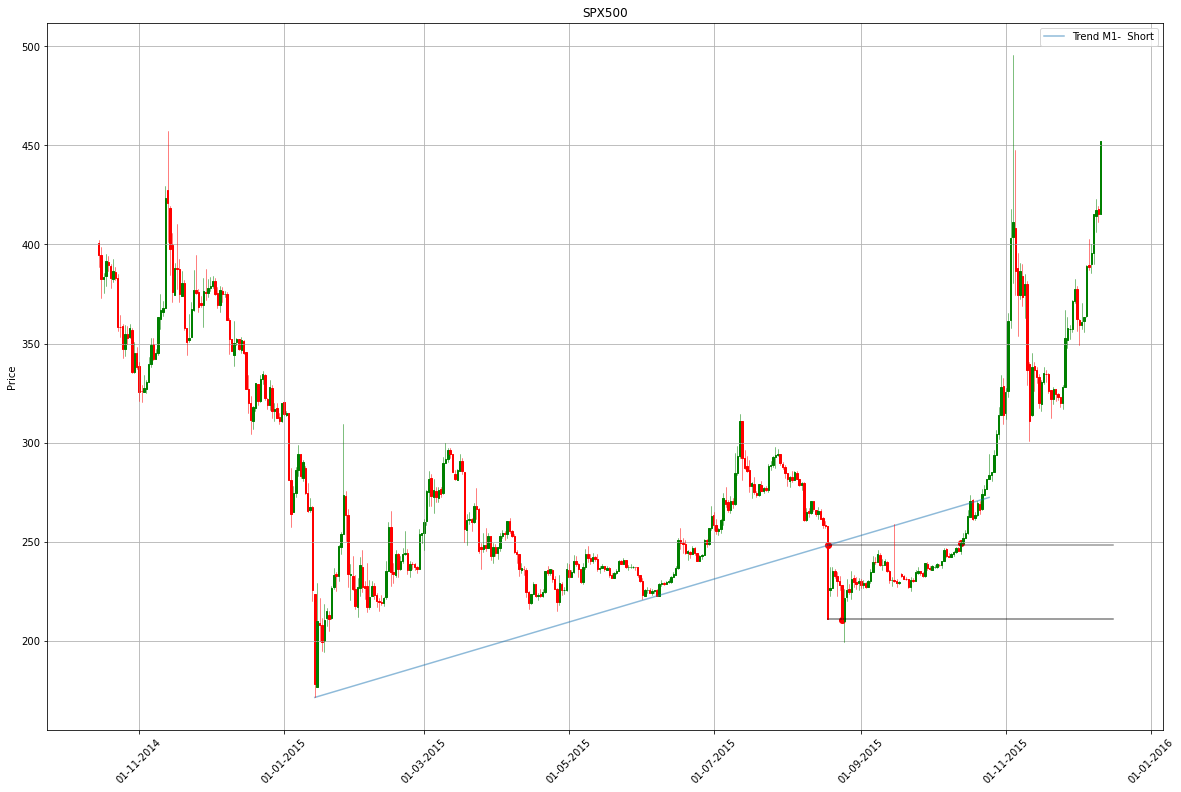

In [61]:
dfxx.reset_index(inplace = True)
dfM1.reset_index(inplace = True)
dfM1a.reset_index(inplace = True)

fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax4 = fig.add_subplot(111)


ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

#ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

ax3.plot(UplineX, UplineY, color='black', alpha = 0.4)
ax3.plot(DownlineX, DownlineY, color='black', alpha = 0.5)

ax4.scatter(BP1[0], BP1[1], alpha=1, color = 'red', edgecolors = 'face' )
ax4.scatter(BP2[0], BP2[1], alpha=1, color = 'red', edgecolors = 'face' )
ax4.scatter(BP3[0], BP3[1], alpha=1, color = 'red', edgecolors = 'face' )

plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, dfxx.values, width=0.6, colorup='g', colordown='r')
plt.show()

# Sprawdamy kolejne przerwania lini trendu

In [62]:
dfxxx = df.loc[Start:End]
dfxxx.index = dfxxx.index.map(mdates.date2num)

In [63]:
try:
    BP2
except NameError:

    print("First break of trend did not occur")

else:
    
    print("First break of trend occured. We can check if trend goes down and breaks trendline up again")
    print('-------------------------------------------------------------------------------------------')
    
    #Zakres szukania i podstawione wartości z linie trendu
    dfM11 = dfxxx[BP2Position+1:]
    dfM11['TrendLine'] = dfM11.index * a2 + b2

    #W tym przypadku sprawdzamy jedynie ceny zamknięcia
    #Szukamy dalej jeżeli cena zamknięcia przebiła TL w dół dla spadkowego lub w górę dla trendu wzrostowego
    #Sprawdzamy położenie Lini trendu względem ceny zamknięcia i ceny otwarcia
    dfM11['Distance(Close-TL)'] = dfM11['TrendLine'] - dfM11['Close']

    GrowingTLUp = len(dfM11.index[dfM11['Distance(Close-TL)']<0])
    DecliningTLDown = len(dfM11.index[dfM11['Distance(Close-TL)']>0])

    if a2 > 0: 
        if GrowingTLUp >0:

            Position2 = dfM11.index[dfM11['Distance(Close-TL)']<0][0]
            print('Ponowne przerwanie trendu Wzrostowego w górę, możemy szukać kolejnych przełamań')
            print(f'Pozycja przerwania: {Position2}')
            print('-------------------------------------------------------------------------------')
            dfM11 = dfxxx[Position2:]
        else:
            print('')

    elif a2 < 0:
        if DecliningTLDown > 0:

            Position2 = dfM11.index[dfM11['Distance(Close-TL)']>0][0]
            print('Ponowne przerwanie trendu spadkowego w dół, możemy szukać kolejnych przełamań')
            print(f'Pozaycja przerwania: {Position2}')
            print('-------------------------------------------------------------------------------')
            dfM11 = dfxxx[ :]
        else:
            print('')

First break of trend occured. We can check if trend goes down and breaks trendline up again
-------------------------------------------------------------------------------------------
Ponowne przerwanie trendu Wzrostowego w górę, możemy szukać kolejnych przełamań
Pozycja przerwania: 16725.0
-------------------------------------------------------------------------------


In [64]:
#Zakres szukania i podstawione wartości z linie trendu
dfM11 = dfxxx[Position2:]
dfM11['TrendLine'] = dfM11.index * a2 + b2

#Sprawdzamy położenie Lini trendu względem ceny zamknięcia i ceny otwarcia
dfM11['Distance(Close-TL)'] = dfM11['TrendLine'] - dfM11['Close']
dfM11['Distance(Open-TL)'] = dfM11['TrendLine'] - dfM11['Open']

#Zbieramy wartości dla trendu wzrostowego i spadkowego
GrowingTLClose = len(dfM11.index[dfM11['Distance(Close-TL)']>0])
GrowingTLOpen = len(dfM11.index[dfM11['Distance(Open-TL)']>0])
DecliningTLClose = len(dfM11.index[dfM11['Distance(Close-TL)']<0])
DecliningTLOpen = len(dfM11.index[dfM11['Distance(Open-TL)']<0])

#Dla a2 > 0 - wzrostowy używamy Growing, dla a2 < 0 - spadkowy używamy Declining
if (a2 > 0 and (GrowingTLClose <= 0 or GrowingTLOpen <= 0)) or (a2 < 0 and (DecliningTLClose <= 0 or DecliningTLOpen <= 0)):

    print('Brak przełamań lini trendu')

else:
    print('Trend został przełamany ')

    #Zbieramy wartości dla trendu wzrostowego i spadkowego


    
    print("First break of trend occured. We can check if trend goes down and breaks trendline up again")
    print('-------------------------------------------------------------------------------------------')
    
    if a2 > 0:
        GrowingTLClosePosition2 = dfM11.index[dfM11['Distance(Close-TL)']>0][0]
        GrowingTLOpenPosition2 = dfM11.index[dfM11['Distance(Open-TL)']>0][0]
        
        if GrowingTLClosePosition2 < GrowingTLOpenPosition2:
        
            BPPosition2 = GrowingTLClosePosition2

        elif GrowingTLClosePosition2 > GrowingTLOpenPosition2:

            BPPosition2 = GrowingTLOpenPosition2

        elif GrowingTLClosePosition2 == GrowingTLOpenPosition2:

            BPPosition2 = GrowingTLClosePosition2 - 1
    
    elif a2 <0:
        DecliningTLClosePosition2 = dfM11.index[dfM11['Distance(Close-TL)']<0][0]
        DecliningTLOpenPosition2 = dfM11.index[dfM11['Distance(Open-TL)']<0][0]
        
        if DecliningTLClosePosition2 < DecliningTLOpenPosition2:

            BPPosition2 = DecliningTLClosePosition2

        elif DecliningTLClosePosition2 > DecliningTLOpenPosition2:


            BPPosition2 = DecliningTLOpenPosition2

        elif DecliningTLClosePosition2 == DecliningTLOpenPosition2:

            BPPosition2 = DecliningTLClosePosition2 - 1
        

Trend został przełamany 
First break of trend occured. We can check if trend goes down and breaks trendline up again
-------------------------------------------------------------------------------------------


In [65]:
# Sprawdzamy wielkość tuneli w stosunku do wielkości świec

CloseBPPrice2 = dfM11['Close'].loc[BPPosition2]
OpenBPPrice2 = dfM11['Open'].loc[BPPosition2]

BPPosition2End = dfM11.index[-1] + 5
UplineXX = [BPPosition2, BPPosition2End]
DownlineXX = [BPPosition2, BPPosition2End]


#Trend spadkowy
if a2 < 0:

    #Klasycznie
    if DecliningTLClosePosition2 < DecliningTLOpenPosition2:

        BPPosition2 = DecliningTLClosePosition2
        BPPrice2 = BPPosition2 * a2 + b2

        print('Przerwanie trendu spadkowego w górę - klasycznie')

        TunelHeight = CloseBPPrice2 - BPPrice2
        CandleHeight = CloseBPPrice2 - OpenBPPrice2

        #Jeśli tunel mniejszy niż 1/4 świeczki
        if TunelHeight/CandleHeight <1/4:

            UplineYY = [CloseBPPrice2, CloseBPPrice2]
            DownlineYY = [OpenBPPrice2, OpenBPPrice2]
            BP11 = [BPPosition2, OpenBPPrice2]

        else:

            UplineYY = [CloseBPPrice2, CloseBPPrice2]
            DownlineYY = [BPPrice2, BPPrice2]
            BP11 = [BPPosition2, BPPrice2]
    #----------------------------------------------  

    #Cena open nad close pod TL    
    elif DecliningTLClosePosition2 > DecliningTLOpenPosition2:

        BPPosition2 = DecliningTLOpenPosition2
        BPPrice2 = BPPosition2 * a2 + b2

        print('Przerwanie trendu spadkowego w górę - ceną otwarcia')

        TunelHeight = BPPrice2 - CloseBPPrice2
        CandleHeight = OpenBPPrice2 - CloseBPPrice2

        if TunelHeight/CandleHeight <1/4:

            UplineYY = [OpenBPPrice2, OpenBPPrice2]
            DownlineYY = [CloseBPPrice2, CloseBPPrice2]
            BP11 = [BPPosition2, OpenBPPrice2]

        else:

            UplineYY = [BPPrice2, BPPrice2]
            DownlineYY = [CloseBPPrice2, CloseBPPrice2]
            BP11 = [BPPosition2, BPPrice2]
    #------------------------------------------------

    #Open i close nad TL    
    elif DecliningTLClosePosition2 == DecliningTLOpenPosition2:

        BPPosition2 = DecliningTLClosePosition2 - 1
        BPPrice2 = BPPosition2 * a2 + b2

        print('Przerwanie trendu spadkowego w górę - całą świecą')

        if OpenBPPrice2 > CloseBPPrice2:

            UplineYY = [BPPrice2, BPPrice2]
            DownlineYY = [CloseBPPrice2, CloseBPPrice2]
            BP11 = [BPPosition2, BPPrice2]

        else:

            UplineYY = [BPPrice2, BPPrice2]
            DownlineYY = [OpenBPPrice2, OpenBPPrice2]
            BP11 = [BPPosition2, BPPrice2]
#------------------------------------------------------------------

#Trend wzrostwy        
if a2 > 0:

    #Klasycznie
    if GrowingTLClosePosition2 < GrowingTLOpenPosition2:

        BPPosition2 = GrowingTLClosePosition2
        BPPrice2 = BPPosition2 * a2 + b2

        print('Przerwanie trendu wzrostowego w dół - klasycznie') 

        TunelHeight = BPPrice2 - CloseBPPrice2
        CandleHeight = OpenBPPrice2 - CloseBPPrice2

        if TunelHeight/CandleHeight <1/4:

            UplineYY = [OpenBPPrice2, OpenBPPrice2]
            DownlineYY = [CloseBPPrice2, CloseBPPrice2]
            BP11 = [BPPosition2, CloseBPPrice2]

        else:

            UplineYY = [BPPrice2, BPPrice2]
            DownlineYY = [CloseBPPrice2, CloseBPPrice2]
            BP11 = [BPPosition2, BPPrice2]
    #------------------------------------------------------

    #Cena open pod close nas TL    
    elif GrowingTLClosePosition2 > GrowingTLOpenPosition2:

        BPPosition2 = GrowingTLOpenPosition2
        BPPrice2 = BPPosition2 * a2 + b2

        print('Przerwanie trendu wzrostowego w dół - ceną otwarcia') 

        TunelHeight = CloseBPPrice2 - BPPrice2
        CandleHeight = CloseBPPrice2 - OpenBPPrice2

        if TunelHeight/CandleHeight <1/4:

            UplineYY = [CloseBPPrice2, CloseBPPrice2]
            DownlineYY = [OpenBPPrice2, OpenBPPrice2]
            BP11 = [BPPosition2, OpenBPPrice2]

        else:

            UplineYY = [CloseBPPrice2, CloseBPPrice2]
            DownlineYY = [BPPrice2, BPPrice2]
            BP11 = [BPPosition2, BPPrice2]
     #----------------------------------------------------   

    #Open i Close pod TL    
    elif GrowingTLClosePosition2 == GrowingTLOpenPosition2:

        BPPosition2 = GrowingTLClosePosition2 - 1
        BPPrice2 = BPPosition2 * a2 + b2

        print('Przerwanie trendu wzrostowego w dół - całą świecą')  

        if OpenBPPrice2 > CloseBPPrice2:

            UplineYY = [OpenBPPrice2, OpenBPPrice2]
            DownlineYY = [BPPrice2, BPPrice2]
            BP11 = [BPPosition2, BPPrice2]

        else:

            UplineYY = [CloseBPPrice2, CloseBPPrice2]
            DownlineYY = [BPPrice2, BPPrice2]
            BP11 = [BPPosition2, BPPrice2]
#----------------------------------------------------------------------------
print('-----------------------------------------------')            
print(f'Wybrany poziom oporu: {UplineYY[0]}')
print(f'Wybrany poziom wsparcia: {DownlineYY[0]}')
print(f'Pierwszy punkt przecięcia: {BPPrice2}')
#----------------------------------------------------------------------------------------------------------------

Przerwanie trendu wzrostowego w dół - ceną otwarcia
-----------------------------------------------
Wybrany poziom oporu: 270.640015
Wybrany poziom wsparcia: 262.747009
Pierwszy punkt przecięcia: 269.53215783333417


1. Cena wróciła do trendu
2. Cena ponownie przebiła trend
-------------------------------------------------------------------------------------------
Long Position2 recomended
First Break Point: [16725.0, 262.747009]
Second Break Point: [16726.0, 261.643005]
Third and decisive Break Point: [16730.0, 274.02301]


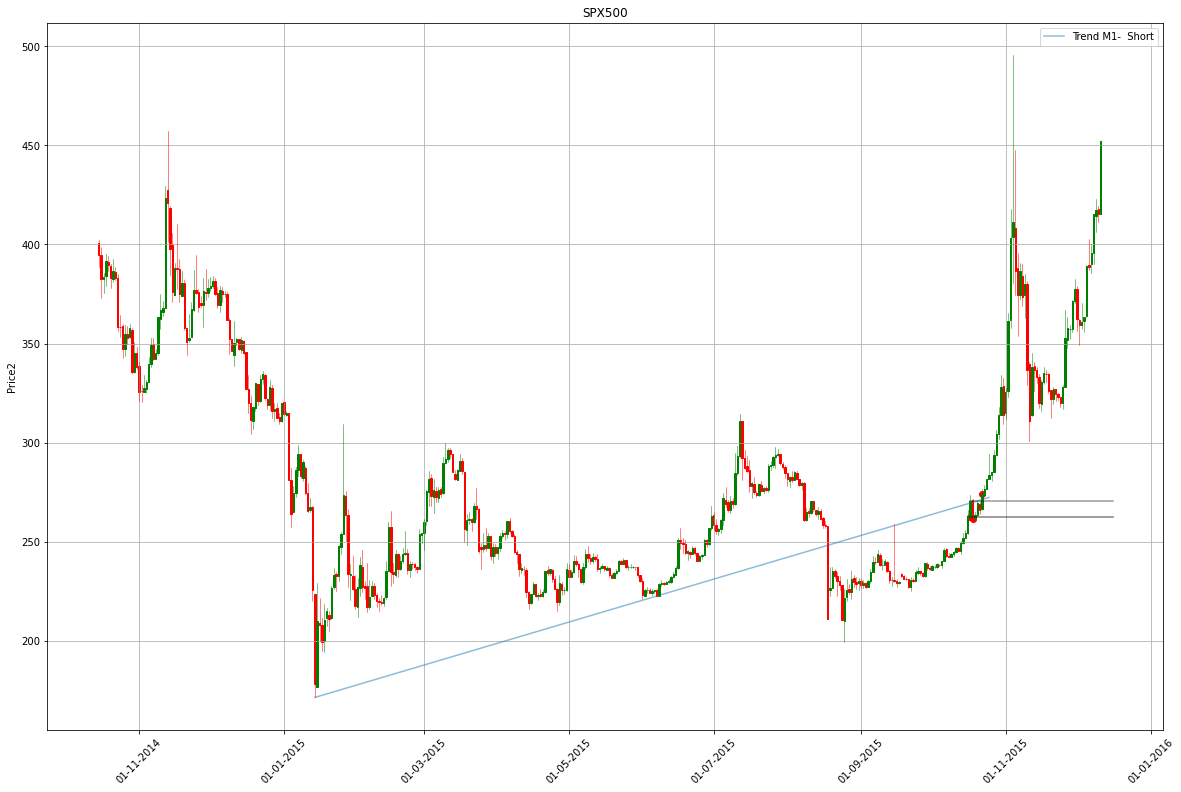

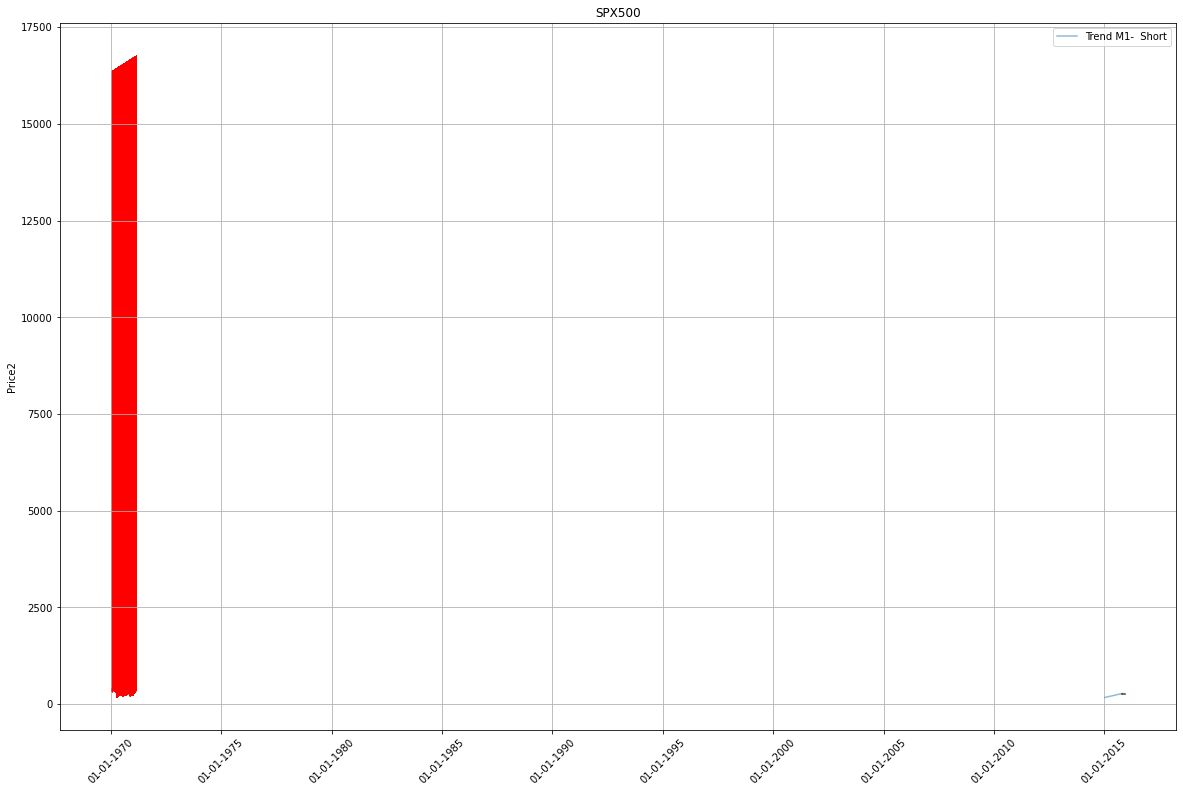

In [66]:
try:
    Position2 and BP11
except NameError:

    print("First break of trend did not occur")

else:
    
    print("1. Cena wróciła do trendu")
    print("2. Cena ponownie przebiła trend")
    print('-------------------------------------------------------------------------------------------')
    
    dfM11b = dfxxx[BPPosition2:]

    dfM11b['DownLine'] = DownlineYY[0]
    dfM11b['UpLine'] = UplineYY[0]
    dfM11b['Down-Close'] = dfM11b['Close'] - dfM11b['DownLine']
    dfM11b['UP-Close'] = dfM11b['UpLine'] - dfM11b['Close']
    
    #Liczymy przecięcia tuneli tuneli
    DownBreaks = len(dfM11b['Close'][dfM11b['Down-Close'] < 0])
    UpBreaks = len(dfM11b['Close'][dfM11b['UP-Close'] < 0])


    #Jeżeli tylko przebicie w dół
    if DownBreaks > 0 and UpBreaks == 0:

        BP12Price2 = dfM11b['Close'][dfM11b['Down-Close'] < 0].iloc[0]
        BP12Position2 = dfM11b.index[dfM11b['Down-Close']<0][0]
        BP11 = [BPPosition2, BPPrice2]
        BP12 = [BP12Position2, BP12Price2]
        BP13 = BP12

        BreakHeight = DownlineYY[0] - BP12Price2
        TunelHeight = UplineYY[0] - DownlineYY[0]

        if BreakHeight >= 0.5 * TunelHeight:

            print('BP12 breaks Tunel by more than 50% height of tunel')
            print('Short Position2 recomended')

        #Sprawdzamy, czy 2 świeczka zamyka się poniżej poprzedniej ceny zamknięcia:
        elif dfM11b['Close'].loc[BP12Position2 +1] < BP12Price2 and BreakHeight >= 0.3 * TunelHeight and BreakHeight < 0.5 * TunelHeight:

            print('---------------------------------------------------------------------')
            print('Close Price2 after BP is lower than BP close Price2 and BP12 breaks Tunel by more than 30% height of tunel')
            print('Long Position2 recomended')

        else:
            print('No decisice BP yet')


    #Jeśeli tylko przebicie w górę
    elif UpBreaks > 0 and DownBreaks == 0:

        BP13Price2 = dfM11b['Close'][dfM11b['UP-Close'] < 0].iloc[0]
        BP13Position2 = dfM11b.index[dfM11b['UP-Close'] < 0][0]
        BP11 = [BPPosition2, BPPrice2]
        BP13 = [BP13Position2, BP13Price2]
        BP12 = BP13

        print('Second BP founded')
        print(f'BP12Price2: {BP13Price2}, BP12Position2: {BP13Position2}')

        BreakHeight = BP13Price2 - UplineYY[0]
        TunelHeight = UplineYY[0] - DownlineYY[0]

        if BreakHeight >= 0.5 * TunelHeight:

            print('------------------------------------------------')
            print('BP12 breaks Tunel by more than 50% height of tunel')
            print('Long Position2 recomended')


        #Sprawdzamy, czy 2 świeczka zamyka się powyżej poprzedniej ceny zamknięcia:
        elif dfM11b['Close'].loc[BP13Position2 + 1] > BP13Price2 and BreakHeight >= 0.3 * TunelHeight and BreakHeight < 0.5 * TunelHeight:

            print('---------------------------------------------------------------------')
            print('Close Price2 after BP is higher than BP close Price2 and BP12 breaks Tunel by more than 30% height of tunel')
            print('Long Position2 recomended')

        else:
            print('No decisice BP yet')

    #Jeśli przebicie w górę i dół
    elif DownBreaks > 0 and UpBreaks > 0:

        BP12Price2 = dfM11b['Close'][dfM11b['Down-Close'] < 0].iloc[0]
        BP12Position2 = dfM11b.index[dfM11b['Down-Close']<0][0]

        BP13Price2 = dfM11b['Close'][dfM11b['UP-Close'] < 0].iloc[0]
        BP13Position2 = dfM11b.index[dfM11b['UP-Close'] < 0][0]

        #Jeśli BP12 (przebicie w dół) wystąpiło przed BP13 (przebicie w górę)
        if BP12Position2 < BP13Position2:

            BP12 = [BP12Position2, BP12Price2]
            BP13 = [BP13Position2, BP13Price2]

            print('Long Position2 recomended')
            print(f'First Break Point: {BP11}')
            print(f'Second Break Point: {BP12}')
            print(f'Third and decisive Break Point: {BP13}')

        #Jeśli BP13 (przebicie w górę) wystąpiło przed BP12 (przebicie w dół)
        elif BP12Position2 > BP13Position2:


            BP12 = [BP12Position2, BP12Price2]
            BP13 = [BP13Position2, BP13Price2]

            print('Short Position2 recomended')
            print(f'First Break Point: {BP11}')
            print(f'Second Break Point: {BP13}')
            print(f'Third and decisive Break Point: {BP12}')

    #Jeśli brak kolejnych przebić    
    else:
        print('No 2nd and 3rd BP yet')
        
    
    try:
        BP12
    except NameError:

        print("")

    else:
    
    
        dfxxx.reset_index(inplace = True)
        dfM11.reset_index(inplace = True)
        dfM11b.reset_index(inplace = True)

        fig = plt.figure(figsize=(20,13))
        ax1 = fig.add_subplot(111)
        ax2 = fig.add_subplot(111)
        ax3 = fig.add_subplot(111)
        ax4 = fig.add_subplot(111)


        ax1.xaxis_date()
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

        #ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
        ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

        ax3.plot(UplineXX, UplineYY, color='black', alpha = 0.4)
        ax3.plot(DownlineXX, DownlineYY, color='black', alpha = 0.5)

        ax4.scatter(BP11[0], BP11[1], alpha=1, color = 'red', edgecolors = 'face' )
        ax4.scatter(BP12[0], BP12[1], alpha=1, color = 'red', edgecolors = 'face' )
        ax4.scatter(BP13[0], BP13[1], alpha=1, color = 'red', edgecolors = 'face' )

        plt.ylabel("Price2")
        plt.title('SPX500')
        ax1.grid(True)
        plt.legend(loc='best')
        plt.xticks(rotation=45)
        candlestick_ohlc(ax1, dfxxx.values, width=0.6, colorup='g', colordown='r')
        plt.show()
        

        
    try:
        BP11
    except NameError:

        print("")

    else:

        dfxxx.reset_index(inplace = True)
        dfM11.reset_index(inplace = True)
        dfM11b.reset_index(inplace = True)

        fig = plt.figure(figsize=(20,13))
        ax1 = fig.add_subplot(111)
        ax2 = fig.add_subplot(111)
        ax3 = fig.add_subplot(111)
        ax4 = fig.add_subplot(111)


        ax1.xaxis_date()
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

        #ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
        ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

        ax3.plot(UplineXX, UplineYY, color='black', alpha = 0.4)
        ax3.plot(DownlineXX, DownlineYY, color='black', alpha = 0.5)


        plt.ylabel("Price2")
        plt.title('SPX500')
        ax1.grid(True)
        plt.legend(loc='best')
        plt.xticks(rotation=45)
        candlestick_ohlc(ax1, dfxxx.values, width=0.6, colorup='g', colordown='r')
        plt.show()
